# Cargar y Explorar el Conjunto de Datos
Cargaremos el conjunto de datos de Diabetes de los Indios Pima y mostraremos los valores de cada columna frente al número de muestras.

In [2]:
# Cargar el conjunto de datos y mostrar los valores de las columnas frente al número de muestras
import pandas as pd

# Cargar el conjunto de datos
file_path = "../../datasets/pima_indian_diabetes_dataset/cleaned_dataset.csv"
data = pd.read_csv(file_path)


## Visualización de los Datos
A continuación, se graficarán los valores de cada columna (excepto 'Outcome') para observar su distribución y posibles patrones.

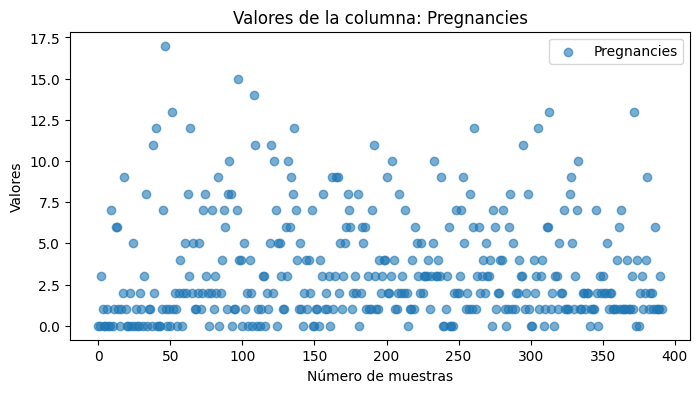

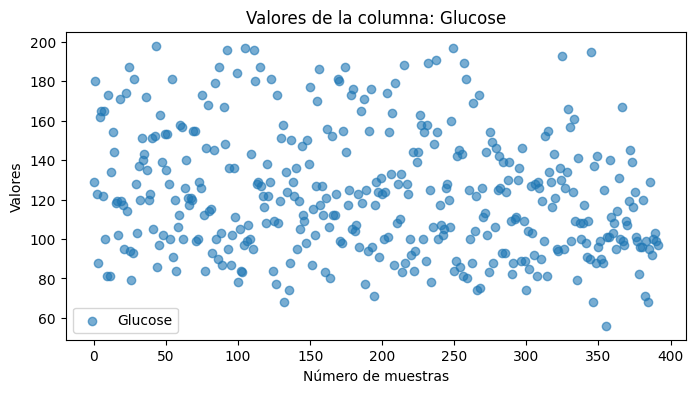

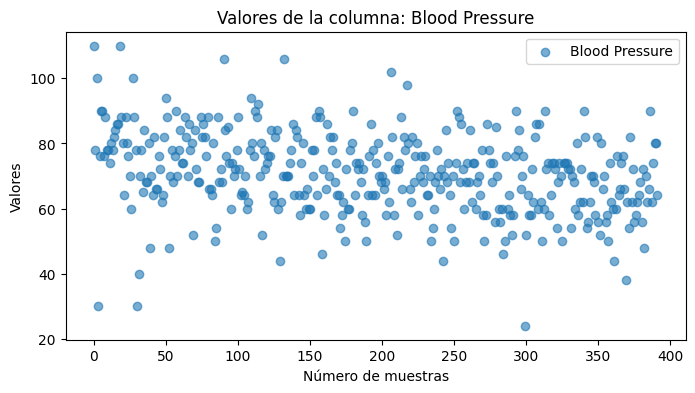

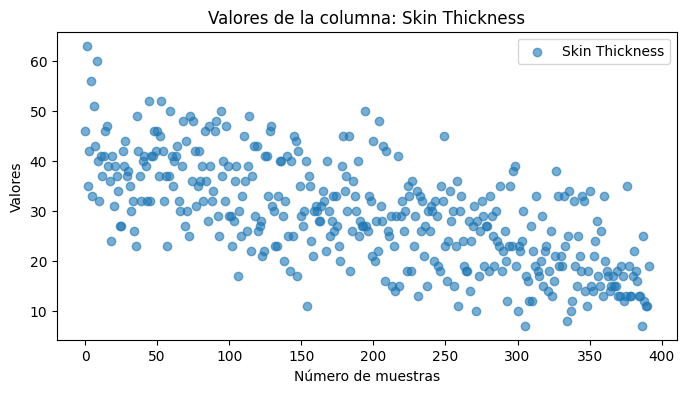

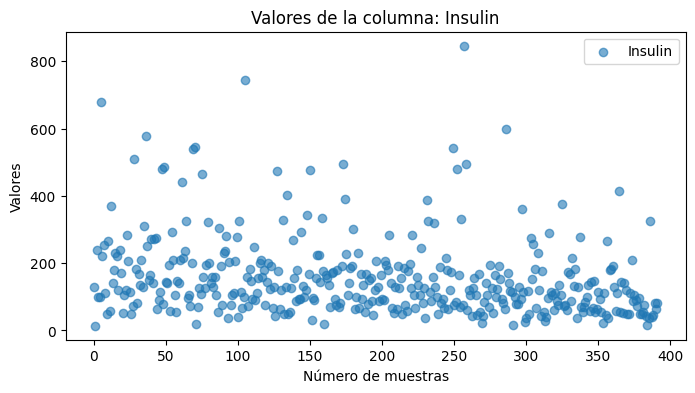

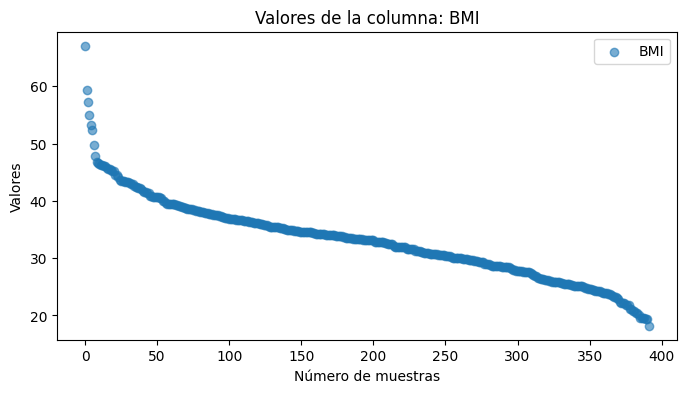

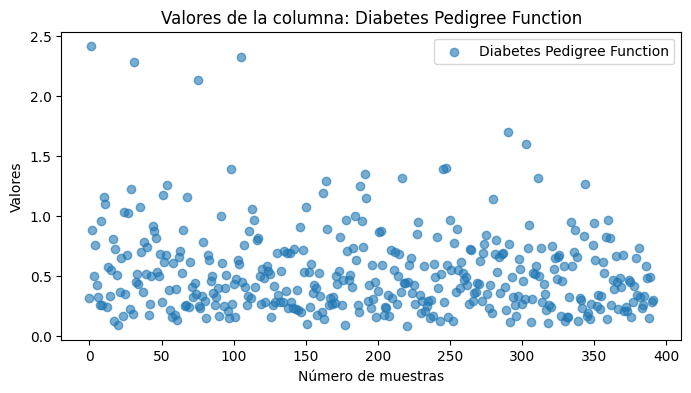

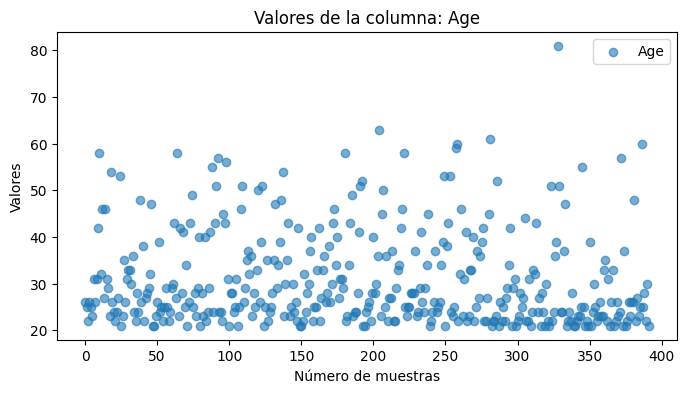

In [3]:
# Visualizar los valores de cada columna (excluyendo 'Outcome') usando puntos
import matplotlib.pyplot as plt

# Crear gráficos de dispersión para cada columna excepto 'Outcome'
for column in data.columns:
    if column == 'Outcome':
        continue
    plt.figure(figsize=(8, 4))
    plt.scatter(range(len(data[column])), data[column], label=column, alpha=0.6)
    plt.title(f'Valores de la columna: {column}')
    plt.xlabel('Número de muestras')
    plt.ylabel('Valores')
    plt.legend()
    plt.show()

# Normalización de Datos
Se realizará una normalización de los datos utilizando la técnica de Min-Max Scaling. Esto transformará los valores de las columnas a un rango entre 0 y 1, lo que puede ser útil para algoritmos de aprendizaje automático sensibles a las escalas de los datos.

## ¿Por qué Normalizar?
La normalización es importante cuando las características tienen rangos diferentes. Por ejemplo, 'Glucose' puede tener valores entre 0 y 200, mientras que 'BMI' puede estar entre 0 y 50. Esto puede afectar el rendimiento de algunos algoritmos.

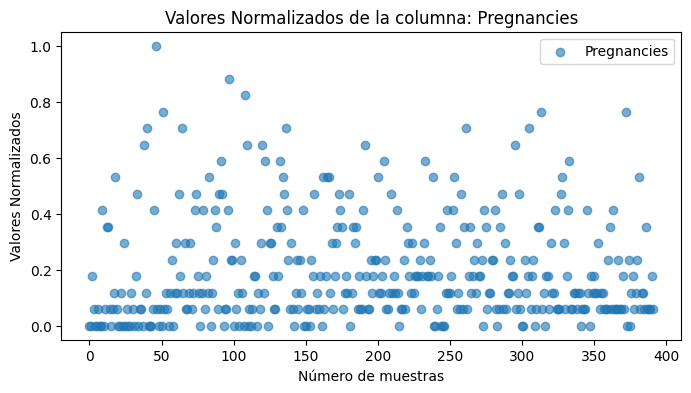

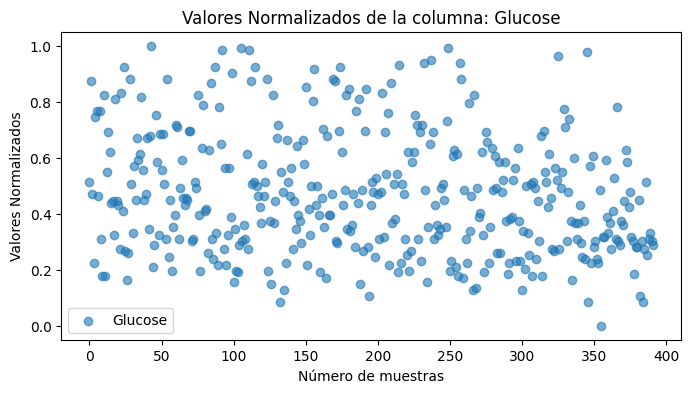

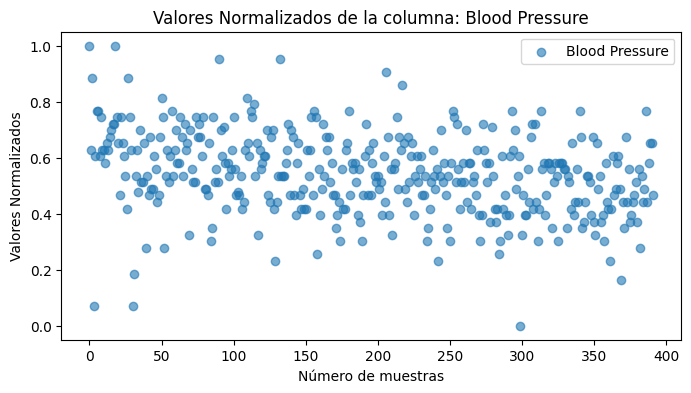

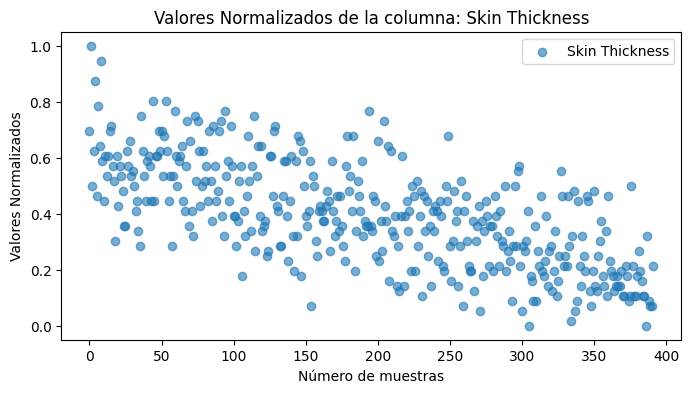

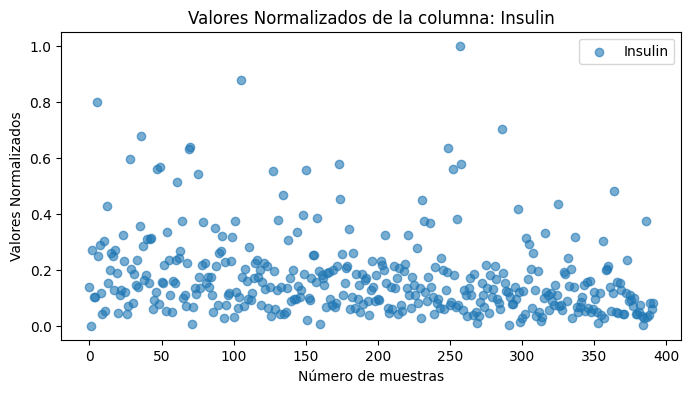

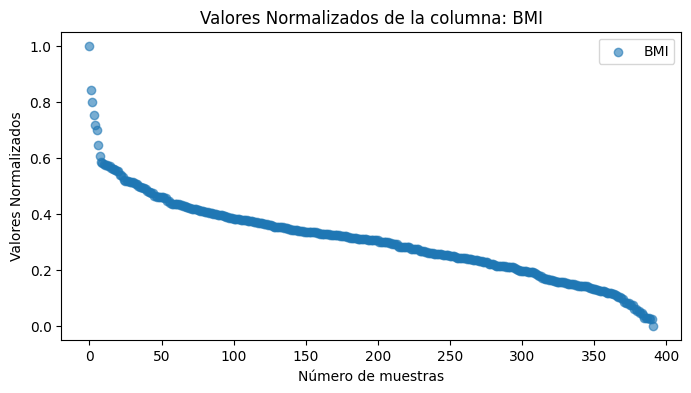

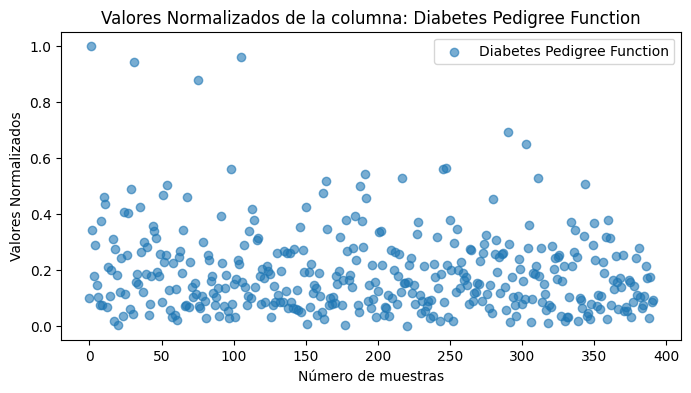

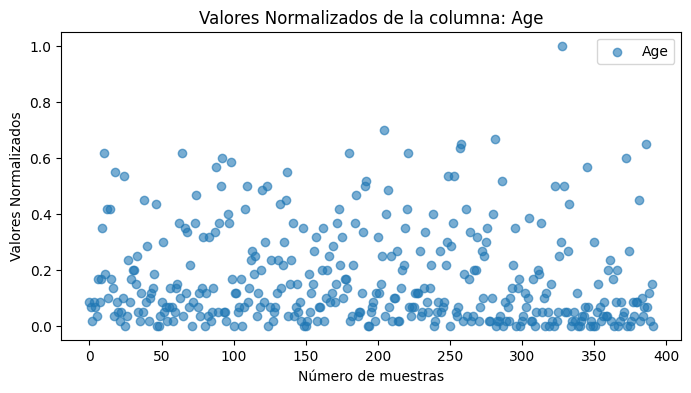

In [4]:
# Normalizar los datos usando Min-Max Scaling y graficar las columnas normalizadas
from sklearn.preprocessing import MinMaxScaler

# Excluir la columna 'Outcome' del proceso de normalización
columns_to_normalize = [col for col in data.columns if col != 'Outcome']
scaler = MinMaxScaler()
normalized_data = data.copy()
normalized_data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Graficar las columnas normalizadas
for column in columns_to_normalize:
    plt.figure(figsize=(8, 4))
    plt.scatter(range(len(normalized_data[column])), normalized_data[column], label=column, alpha=0.6)
    plt.title(f'Valores Normalizados de la columna: {column}')
    plt.xlabel('Número de muestras')
    plt.ylabel('Valores Normalizados')
    plt.legend()
    plt.show()

# Estandarización de Datos
Se realizará una estandarización de los datos utilizando la técnica de Z-score Scaling. Esto transformará los valores de las columnas para que tengan una media de 0 y una desviación estándar de 1, lo que puede ser útil para algoritmos de aprendizaje automático que asumen datos centrados.

## ¿Por qué Estandarizar?
La estandarización es útil cuando se desea que las características tengan la misma escala y se centren en torno a la media. Esto es especialmente importante para algoritmos como SVM o PCA.

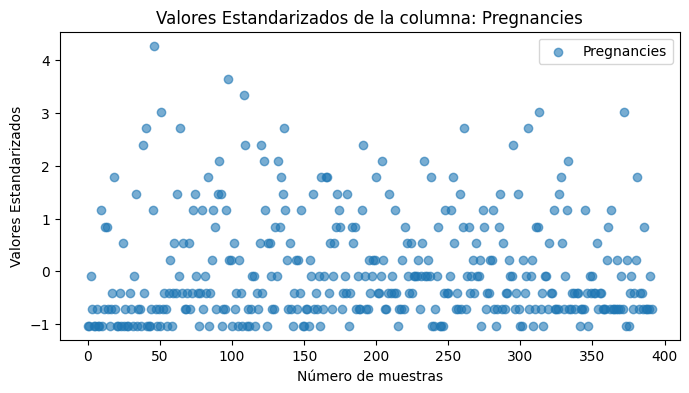

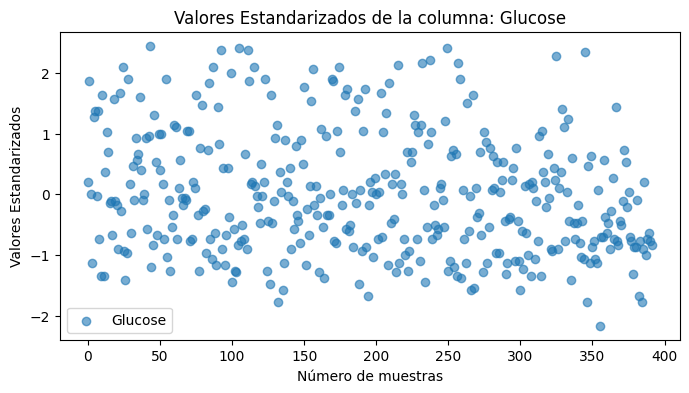

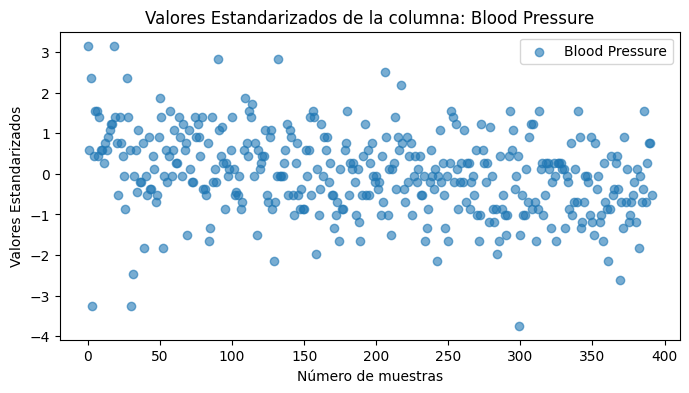

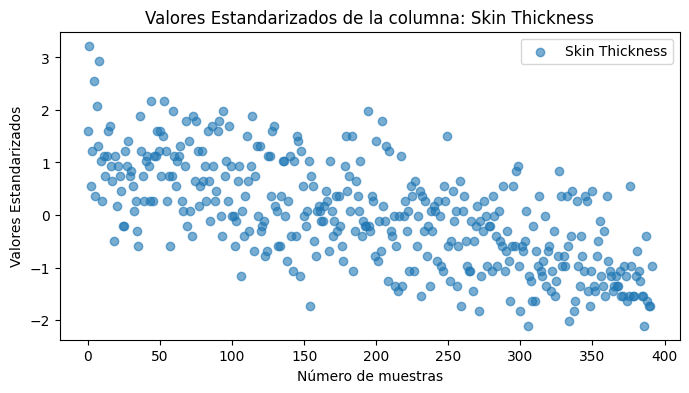

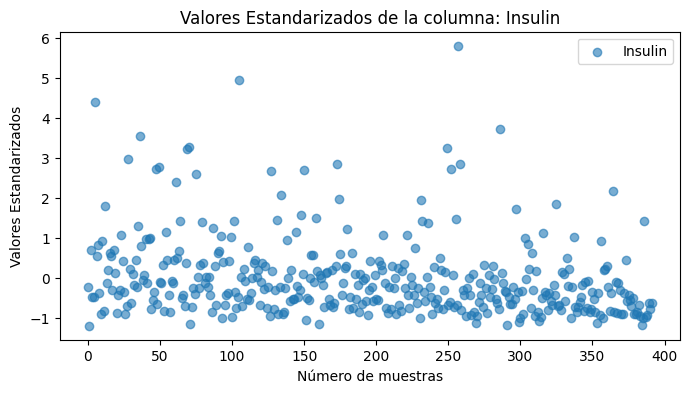

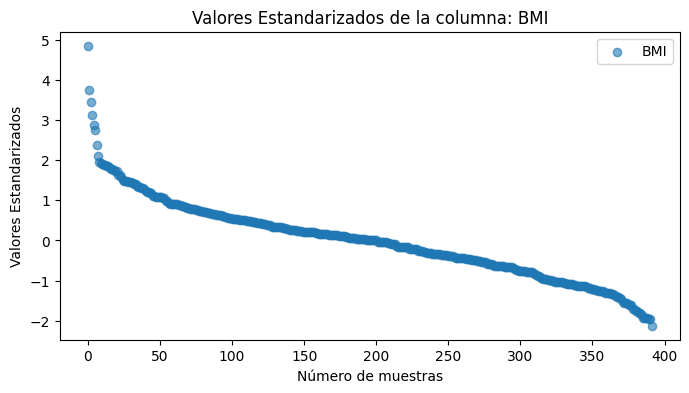

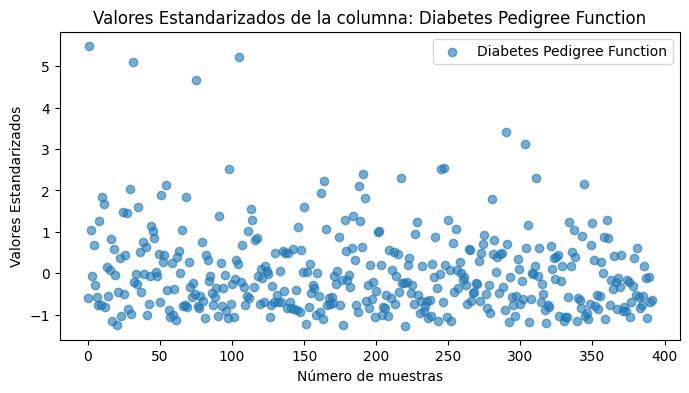

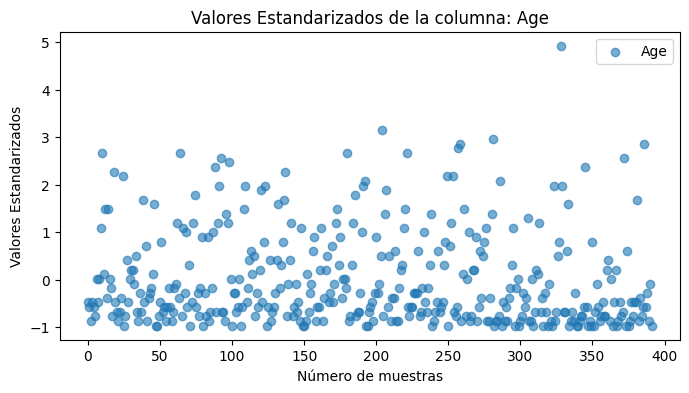

In [5]:
# Estandarizar los datos usando Z-score Scaling y graficar las columnas estandarizadas
from sklearn.preprocessing import StandardScaler

# Excluir la columna 'Outcome' del proceso de estandarización
scaler = StandardScaler()
standardized_data = data.copy()
standardized_data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Graficar las columnas estandarizadas
for column in columns_to_normalize:
    plt.figure(figsize=(8, 4))
    plt.scatter(range(len(standardized_data[column])), standardized_data[column], label=column, alpha=0.6)
    plt.title(f'Valores Estandarizados de la columna: {column}')
    plt.xlabel('Número de muestras')
    plt.ylabel('Valores Estandarizados')
    plt.legend()
    plt.show()

## Comparación de Distribuciones
Se graficarán histogramas de frecuencia para comparar las distribuciones de los datos crudos, normalizados y estandarizados.

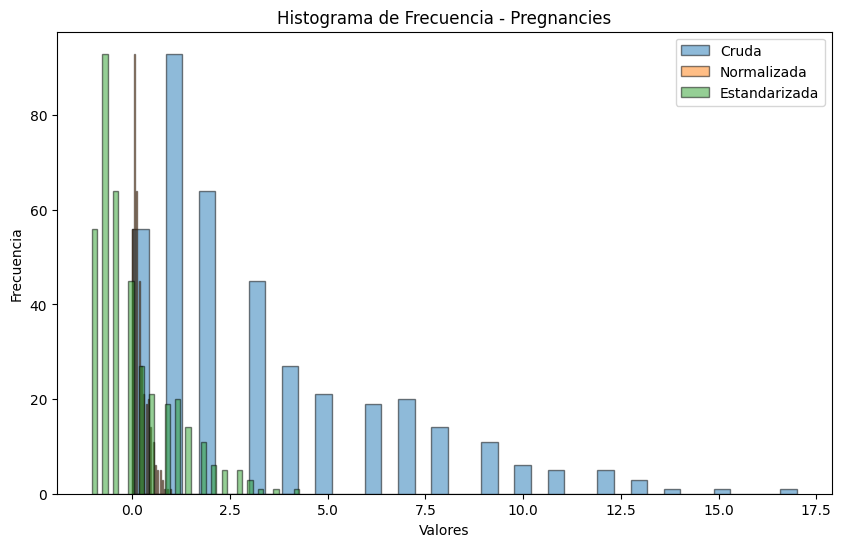

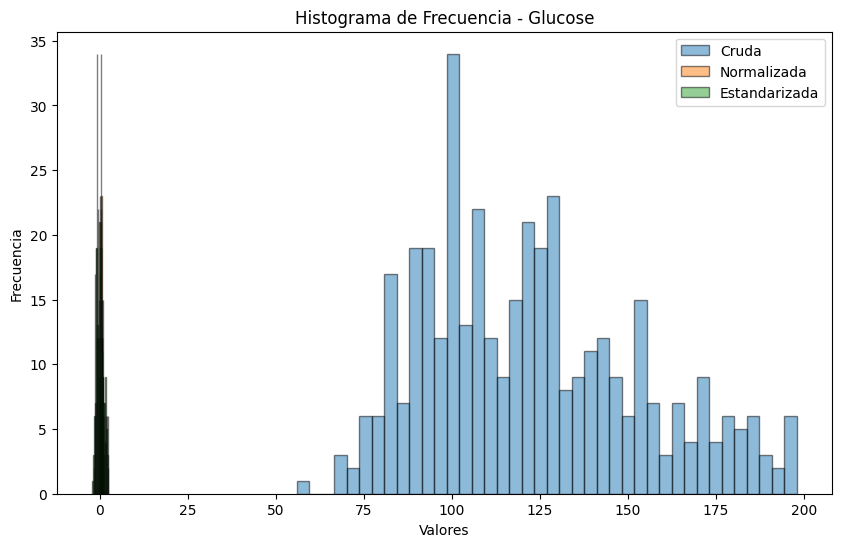

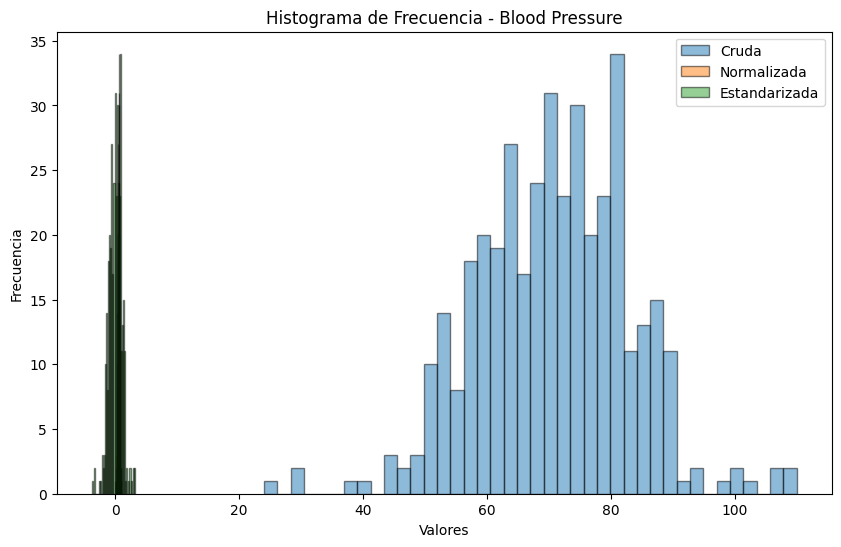

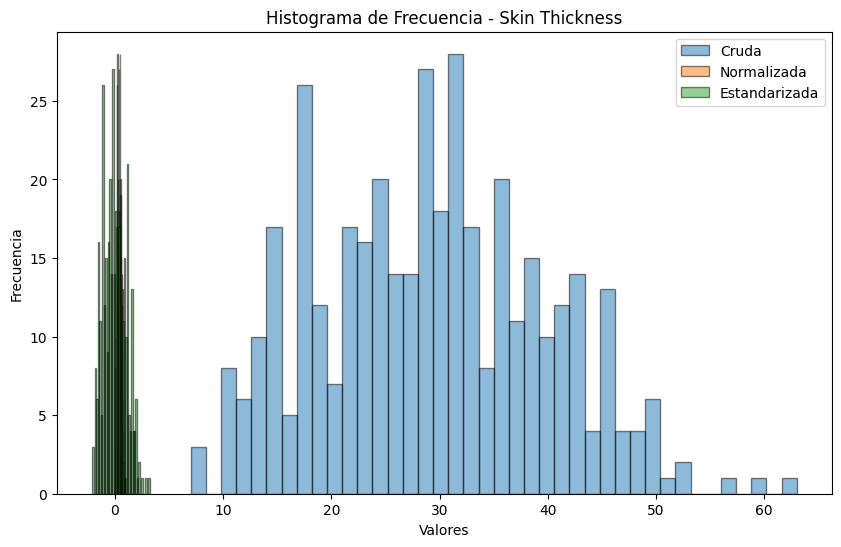

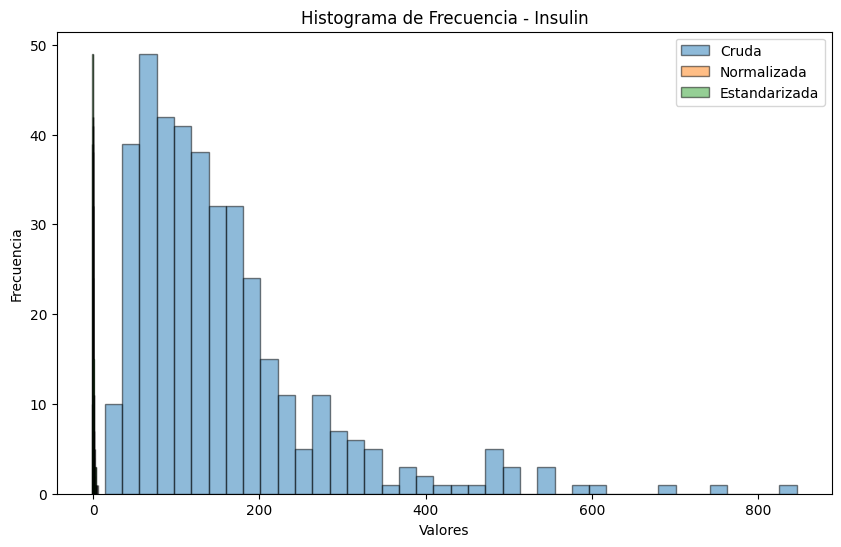

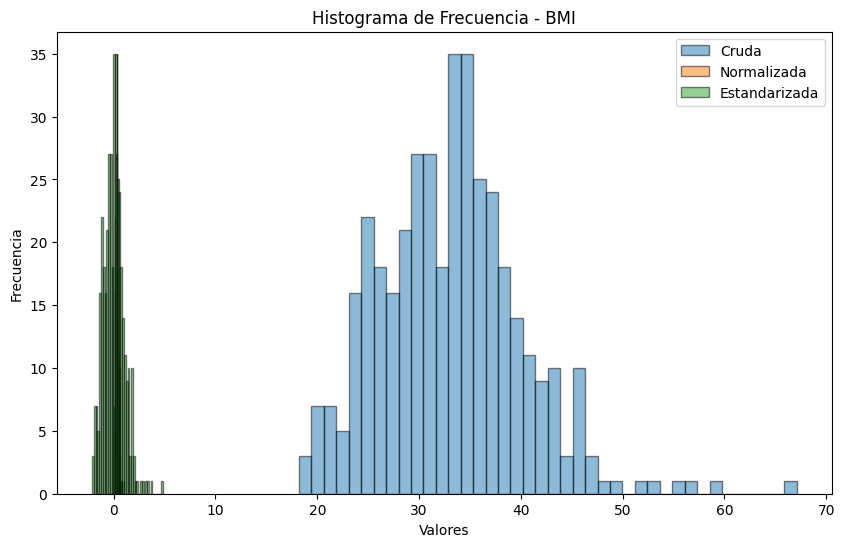

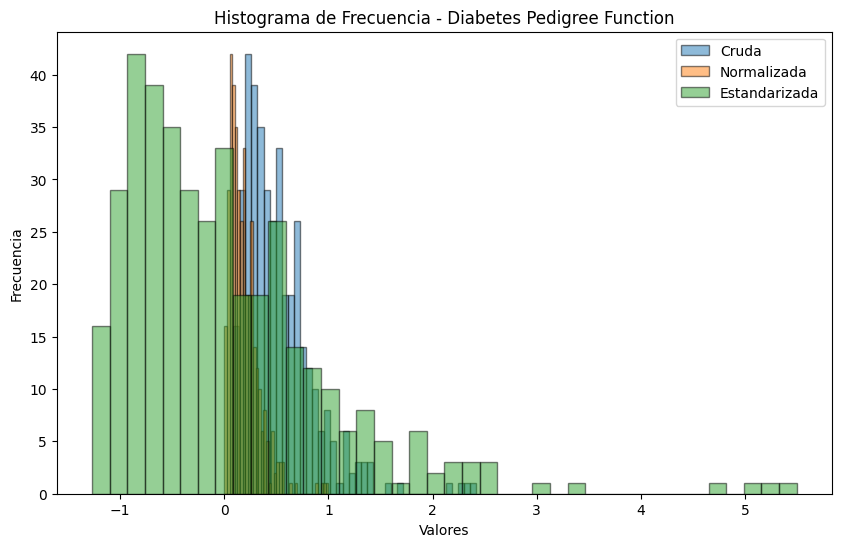

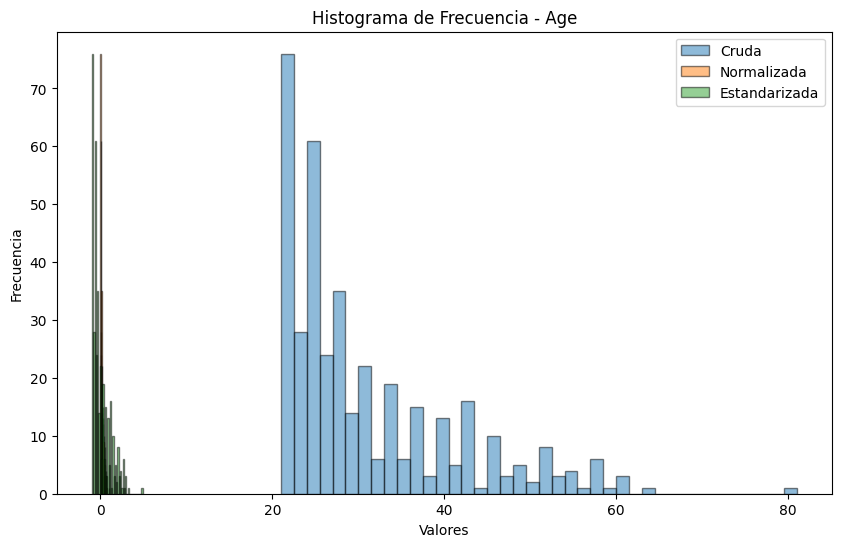

In [6]:
# Visualizar histogramas de frecuencia en una sola imagen para cada feature con 40 bins
def plot_histograms(data_dict, columns, bins=40):
    for column in columns:
        plt.figure(figsize=(10, 6))
        for label, dataset in data_dict.items():
            plt.hist(dataset[column], bins=bins, alpha=0.5, label=label, edgecolor='black')
        plt.title(f'Histograma de Frecuencia - {column}')
        plt.xlabel('Valores')
        plt.ylabel('Frecuencia')
        plt.legend()
        plt.show()

# Diccionario con los datasets
data_versions = {
    "Cruda": data,
    "Normalizada": normalized_data,
    "Estandarizada": standardized_data
}

# Graficar histogramas para cada columna
plot_histograms(data_versions, columns_to_normalize)

# Clasificación con KNN
Se implementará un clasificador KNN para los datos crudos, normalizados y estandarizados. Se calculará la precisión de cada modelo utilizando una división 80-20.

In [7]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Separar características y etiquetas
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

# Dividir los datos en entrenamiento y prueba (80-20)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clasificación con datos crudos
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train_raw, y_train)
y_pred_raw = knn_raw.predict(X_test_raw)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"Precisión con datos crudos: {accuracy_raw:.2f}")

# Clasificación con datos normalizados
X_train_norm, X_test_norm, _, _ = train_test_split(
    normalized_data.drop(columns=["Outcome"]), normalized_data["Outcome"], test_size=0.2, random_state=42
)
knn_norm = KNeighborsClassifier(n_neighbors=5)
knn_norm.fit(X_train_norm, y_train)
y_pred_norm = knn_norm.predict(X_test_norm)
accuracy_norm = accuracy_score(y_test, y_pred_norm)
print(f"Precisión con datos normalizados: {accuracy_norm:.2f}")

# Clasificación con datos estandarizados
X_train_std, X_test_std, _, _ = train_test_split(
    standardized_data.drop(columns=["Outcome"]), standardized_data["Outcome"], test_size=0.2, random_state=42
)
knn_std = KNeighborsClassifier(n_neighbors=5)
knn_std.fit(X_train_std, y_train)
y_pred_std = knn_std.predict(X_test_std)
accuracy_std = accuracy_score(y_test, y_pred_std)
print(f"Precisión con datos estandarizados: {accuracy_std:.2f}")

Precisión con datos crudos: 0.71
Precisión con datos normalizados: 0.81
Precisión con datos estandarizados: 0.73
